In [1]:
import os
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import datasets, models, transforms

import tensorflow as tf

import cv2
from PIL import Image

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
def load_random_image(folder_path):
  images = []
  for file_name in os.listdir(folder_path):
    if file_name.endswith(".jpg") or file_name.endswith(".jpeg") or file_name.endswith(".png"):
      images.append(os.path.join(folder_path, file_name))

  random_image = random.choice(images)
  return random_image

C:\Users\Jegadit\Desktop\root\pah\works\python\AmritaCanteenApp\TableAndCrowd\_datasets\test_canteen_2.jpeg


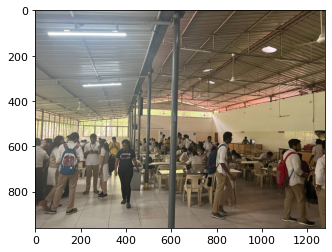

In [8]:
folder_path = "../_datasets/archive/frames/"
random_image_path = r"C:\Users\Jegadit\Desktop\root\pah\works\python\AmritaCanteenApp\TableAndCrowd\_datasets\test_canteen_2.jpeg" # load_random_image(folder_path)

print(random_image_path)
plt.imshow(plt.imread(random_image_path))
plt.show()

In [9]:
# Load YOLOv5 model
TLmodel = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

Using cache found in C:\Users\Jegadit/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-4-26 Python-3.8.8 torch-1.13.1+cpu CPU

Fusing layers... 


requirements: C:\Users\Jegadit\.cache\torch\hub\requirements.txt not found, check failed.


YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [10]:
# Load image and perform inference
img = plt.imread(random_image_path)
results = TLmodel(img)
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 960x1280 18 persons, 3 backpacks, 2 handbags, 3 chairs
Speed: 12.7ms pre-process, 289.1ms inference, 3.0ms NMS per image at shape (1, 3, 480, 640)

In [11]:
# Extract detections of people
detections = results.pred[0][results.pred[0][:, -1] == 0]

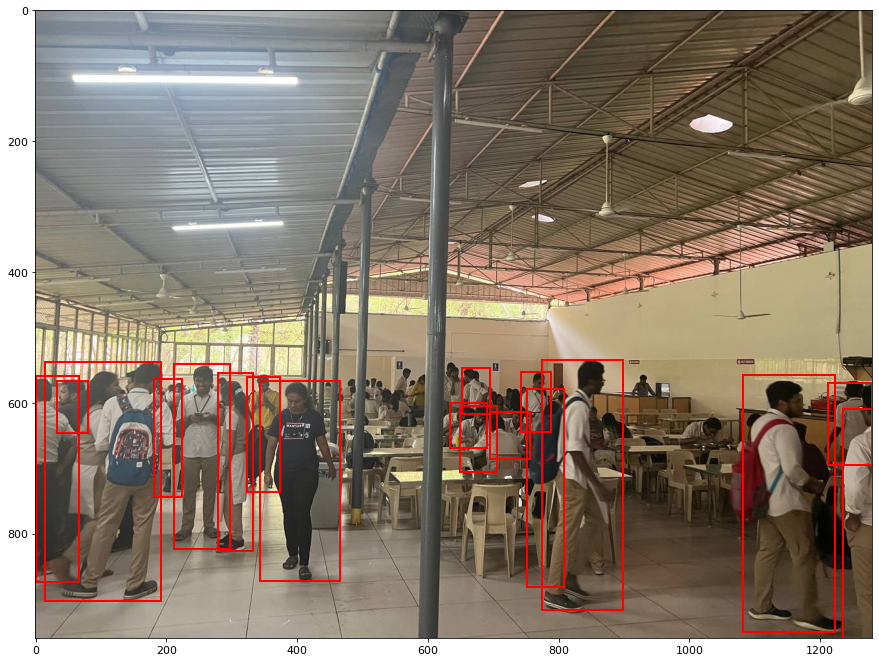

In [12]:
# Display image with bounding boxes around people
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img)
for det in detections:
    box = det[0:4]
    score = det[4]
    label = det[5]
    if label == 0:
        rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1], fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
plt.show()

In [8]:
# Print number of people detected
num_people = len(detections)
print(f'Number of people detected: {num_people}')

Number of people detected: 15


In [9]:
df = pd.read_csv('../_datasets/archive/labels.csv')
df.head()

,id,count
0,1,35
1,2,41
2,3,41
3,4,44
4,5,41


In [10]:
import os

def iterate_images(folder_path):
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".jpg") or file_name.endswith(".jpeg") or file_name.endswith(".png"):
            yield os.path.join(folder_path, file_name)

In [11]:
folder_path = "../_datasets/archive/frames/"
lst = []

for image_path in tqdm(iterate_images(folder_path)):
    img = plt.imread(image_path)
    results = TLmodel(img)
    detections = results.pred[0][results.pred[0][:, -1] == 0]
    num_people = len(detections)
    lst.append(num_people)
    

2000it [11:02,  3.02it/s]


In [15]:
df['predicted'] = lst
df.head()

,id,count,predicted
0,1,35,19
1,2,41,23
2,3,41,21
3,4,44,23
4,5,41,22


In [16]:
c = int(df['predicted'].mean())
c

19

In [17]:
# Load image and perform inference
img = plt.imread(random_image_path)
results = TLmodel(img)
num = len(results.pred[0][results.pred[0][:, -1] == 0]) + c
random_image_path, num

('../_datasets/archive/frames/f_1533.jpg', 34)